In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [59]:
yeast = pd.read_csv('Yeast/yeast.data',delim_whitespace=True,names=['name','mcg','gvh','alm','mit','erl','pox','vac','nuc','Class'])
yeast.head()

,name,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [60]:
classes = yeast.Class.unique()
yeast.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [61]:
np.any(yeast.isnull())

False

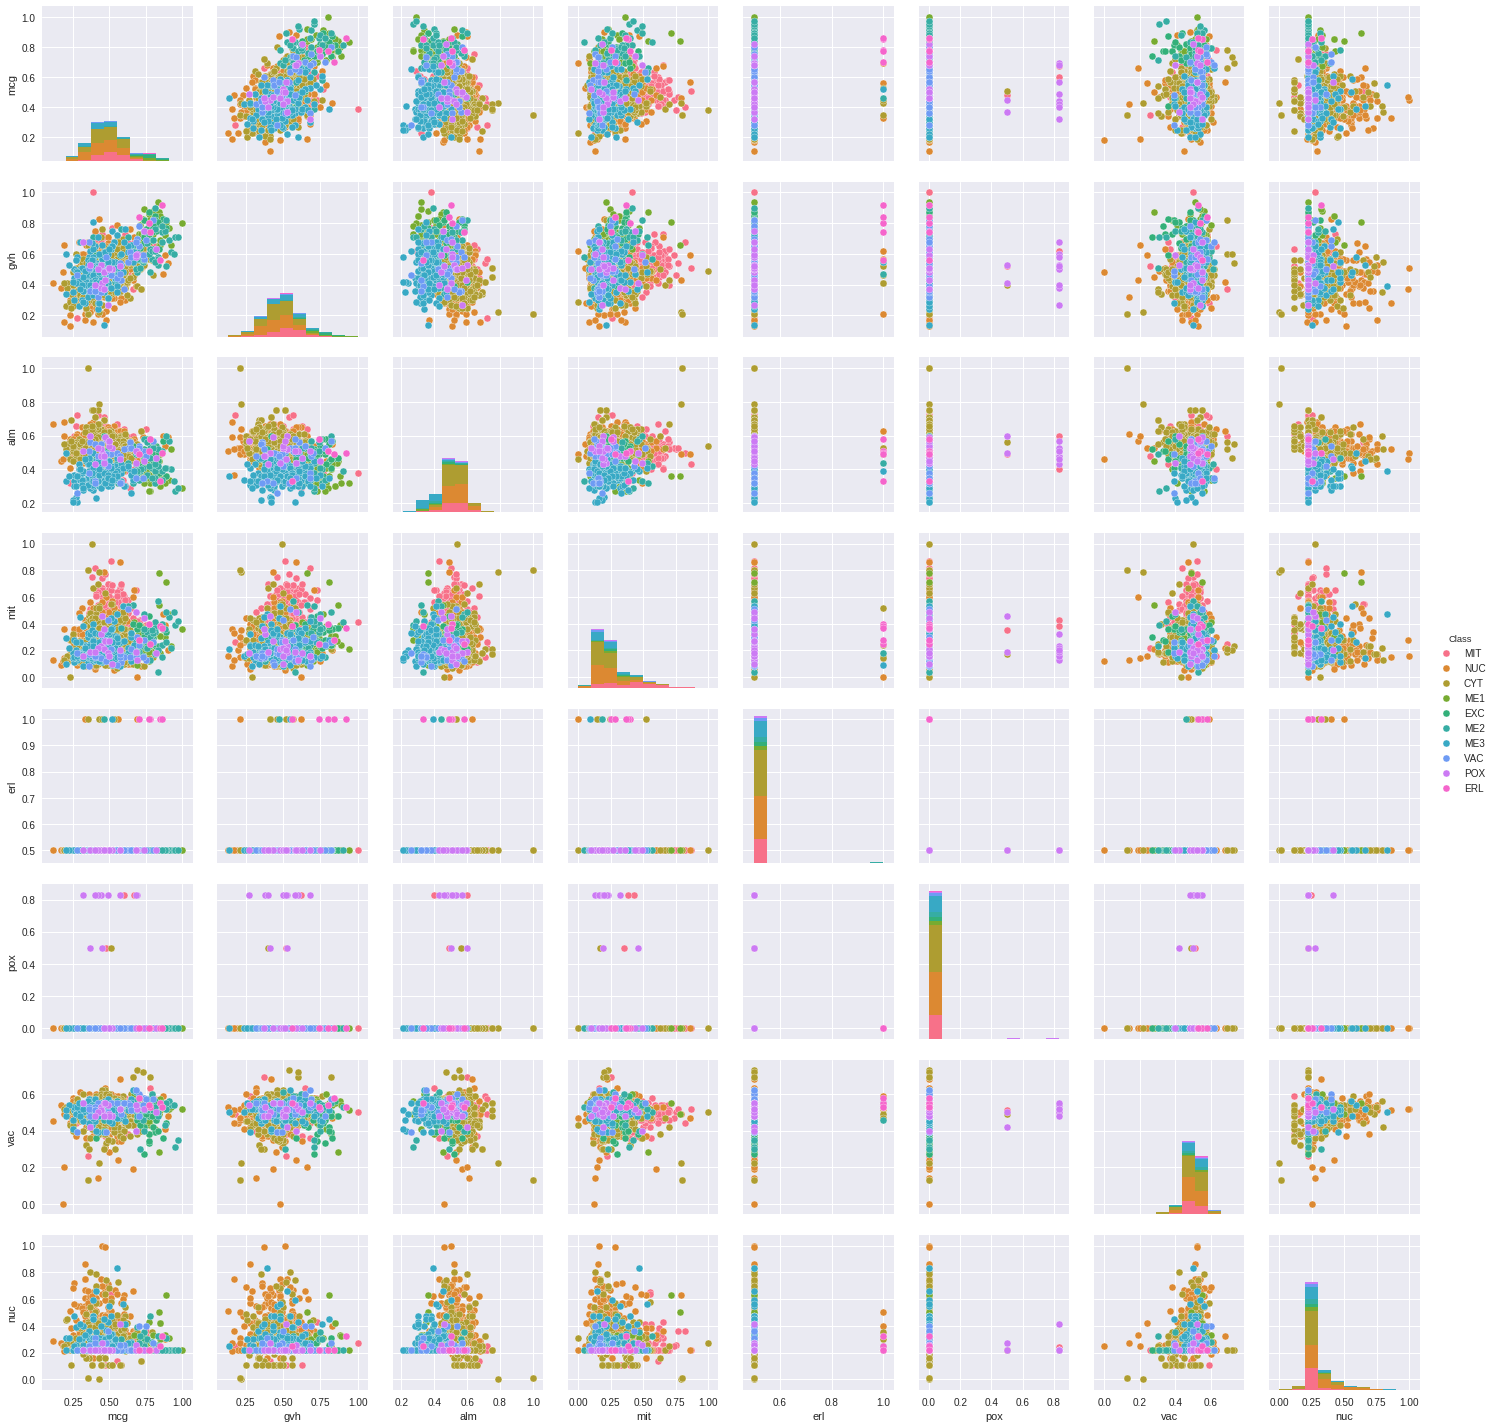

In [62]:
%matplotlib inline
sb.pairplot(yeast, hue='Class')

In [63]:
yeast.drop(yeast.columns[[5,6]],axis=1,inplace=True)
yeast.head()

,name,mcg,gvh,alm,mit,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.48,0.22,MIT


In [64]:
yeast.describe()

,mcg,gvh,alm,mit,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,0.730000,1.000000


In [65]:
def averageDistToCenter(X,C):
    avdist = np.sum(np.sqrt(np.sum((X - C)**2,axis=0)),axis=0)
    avdist /= np.maximum(np.size(X,axis=1),1)
    return avdist

def KMeans(K, X, doPrinting=False):
    d = np.size(X,axis=0)
    N = np.size(X,axis=1)
    I = np.eye(K)
    R = X[:,np.random.randint(0,N,K)] #random start centers
    M = np.zeros((d,K)).astype(int)
    changes = True
    iters = 0
    while changes:
#         D = np.sum((R.T[np.newaxis,:,:] - X.T[:,np.newaxis,:])**2., axis=-1).T # distances from centers
        D = -2. * np.dot(X.T,R) + np.sum(R**2,axis=0,keepdims=True)# it is not necessary to add X^2
        m = np.argmin(D, axis=1)
        newM = np.take(I,m,axis=0).astype(int) # matrix of membership
        changes = not np.array_equal(M,newM)
        M = newM
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1) # new centers
        iters +=1
    if doPrinting:
        avDistToCenter = np.array([averageDistToCenter(X[:,M[:,i] == 1], R[:,i,np.newaxis]) for i in range(K)])
        groupSizes = np.sum(M.T,axis=1)
        print('Average distance to center within groups:\n',avDistToCenter)
        print("Iterations: ", iters, "\n")
        print("Group sizes: ", groupSizes, "\n")
    return R, M, m, groupSizes

In [66]:
yeastData = yeast.iloc[:,1:-1].values.T
K = 10
R, M, m, groupSizes = KMeans(K, yeastData, doPrinting=True)

Average distance to center within groups:
 [ 0.18378513  0.15038353  0.13285539  0.16133946  0.15290279  0.12385257
  0.20591322  0.15300213  0.14213269  0.18262942]
Iterations:  50 

Group sizes:  [139  99 206 151 165 306  60 128 123 107] 



In [68]:
for i in range(K):
    print('Group: ', i, ' # Size: ',groupSizes[i], ' # Results: ')
    for c in classes:
        s = np.sum(M.T[i,yeast.values[:,-1]==c])
        print(c, s, ' -> ', s/groupSizes[i])


Group:  0  # Size:  139  # Results: 
MIT 17  ->  0.122302158273
NUC 4  ->  0.0287769784173
CYT 2  ->  0.0143884892086
ME1 42  ->  0.302158273381
EXC 30  ->  0.215827338129
ME2 27  ->  0.194244604317
ME3 4  ->  0.0287769784173
VAC 6  ->  0.0431654676259
POX 2  ->  0.0143884892086
ERL 5  ->  0.0359712230216
Group:  1  # Size:  99  # Results: 
MIT 1  ->  0.010101010101
NUC 63  ->  0.636363636364
CYT 28  ->  0.282828282828
ME1 0  ->  0.0
EXC 0  ->  0.0
ME2 1  ->  0.010101010101
ME3 5  ->  0.0505050505051
VAC 0  ->  0.0
POX 1  ->  0.010101010101
ERL 0  ->  0.0
Group:  2  # Size:  206  # Results: 
MIT 25  ->  0.121359223301
NUC 47  ->  0.228155339806
CYT 96  ->  0.466019417476
ME1 1  ->  0.00485436893204
EXC 1  ->  0.00485436893204
ME2 14  ->  0.0679611650485
ME3 14  ->  0.0679611650485
VAC 6  ->  0.0291262135922
POX 2  ->  0.00970873786408
ERL 0  ->  0.0
Group:  3  # Size:  151  # Results: 
MIT 8  ->  0.0529801324503
NUC 87  ->  0.576158940397
CYT 48  ->  0.317880794702
ME1 0  ->  0.0
EXC 0

In [71]:
normYeastData = (yeastData - np.min(yeastData, axis=1, keepdims=True)) / (np.max(yeastData, axis=1, keepdims=True) - np.min(yeastData, axis=1, keepdims=True))
R, M, m, groupSizes = KMeans(K, normYeastData, doPrinting=True)

Average distance to center within groups:
 [ 0.17231906  0.21275573  0.22309586  0.2852032   0.18208224  0.16444391
  0.17298896  0.1687262   0.14264414  0.16108161]
Iterations:  24 

Group sizes:  [197 128  92  24 101 151 181 139 296 175] 



In [72]:
for i in range(K):
    print('Group: ', i, ' # Size: ',groupSizes[i], ' # Results: ')
    for c in classes:
        s = np.sum(M.T[i,yeast.values[:,-1]==c])
        print(c, s, ' -> ', s/groupSizes[i])

Group:  0  # Size:  197  # Results: 
MIT 30  ->  0.152284263959
NUC 47  ->  0.238578680203
CYT 66  ->  0.335025380711
ME1 1  ->  0.00507614213198
EXC 3  ->  0.0152284263959
ME2 16  ->  0.0812182741117
ME3 24  ->  0.121827411168
VAC 7  ->  0.0355329949239
POX 3  ->  0.0152284263959
ERL 0  ->  0.0
Group:  1  # Size:  128  # Results: 
MIT 15  ->  0.1171875
NUC 3  ->  0.0234375
CYT 2  ->  0.015625
ME1 42  ->  0.328125
EXC 29  ->  0.2265625
ME2 26  ->  0.203125
ME3 1  ->  0.0078125
VAC 3  ->  0.0234375
POX 2  ->  0.015625
ERL 5  ->  0.0390625
Group:  2  # Size:  92  # Results: 
MIT 2  ->  0.0217391304348
NUC 69  ->  0.75
CYT 16  ->  0.173913043478
ME1 0  ->  0.0
EXC 0  ->  0.0
ME2 0  ->  0.0
ME3 5  ->  0.054347826087
VAC 0  ->  0.0
POX 0  ->  0.0
ERL 0  ->  0.0
Group:  3  # Size:  24  # Results: 
MIT 0  ->  0.0
NUC 7  ->  0.291666666667
CYT 17  ->  0.708333333333
ME1 0  ->  0.0
EXC 0  ->  0.0
ME2 0  ->  0.0
ME3 0  ->  0.0
VAC 0  ->  0.0
POX 0  ->  0.0
ERL 0  ->  0.0
Group:  4  # Size:  101 

In [73]:
normYeastData = (yeastData - np.mean(yeastData, axis=1, keepdims=True)) / np.std(yeastData, axis=1, keepdims=True)
R, M, m, groupSizes = KMeans(K, normYeastData, doPrinting=True)

Average distance to center within groups:
 [ 1.35682384  1.31855109  1.91112305  1.43003748  1.54825789  1.16854993
  2.39078232  1.4034073   1.86143271  1.26544164]
Iterations:  47 

Group sizes:  [151 185 123 187 112 228  46 157  83 212] 



In [74]:
for i in range(K):
    print('Group: ', i, ' # Size: ',groupSizes[i], ' # Results: ')
    for c in classes:
        s = np.sum(M.T[i,yeast.values[:,-1]==c])
        print(c, s, ' -> ', s/groupSizes[i])

Group:  0  # Size:  151  # Results: 
MIT 20  ->  0.132450331126
NUC 59  ->  0.390728476821
CYT 64  ->  0.423841059603
ME1 0  ->  0.0
EXC 3  ->  0.0198675496689
ME2 0  ->  0.0
ME3 1  ->  0.00662251655629
VAC 1  ->  0.00662251655629
POX 3  ->  0.0198675496689
ERL 0  ->  0.0
Group:  1  # Size:  185  # Results: 
MIT 8  ->  0.0432432432432
NUC 84  ->  0.454054054054
CYT 81  ->  0.437837837838
ME1 0  ->  0.0
EXC 0  ->  0.0
ME2 3  ->  0.0162162162162
ME3 3  ->  0.0162162162162
VAC 5  ->  0.027027027027
POX 1  ->  0.00540540540541
ERL 0  ->  0.0
Group:  2  # Size:  123  # Results: 
MIT 2  ->  0.0162601626016
NUC 87  ->  0.707317073171
CYT 27  ->  0.219512195122
ME1 0  ->  0.0
EXC 0  ->  0.0
ME2 0  ->  0.0
ME3 7  ->  0.0569105691057
VAC 0  ->  0.0
POX 0  ->  0.0
ERL 0  ->  0.0
Group:  3  # Size:  187  # Results: 
MIT 128  ->  0.68449197861
NUC 27  ->  0.144385026738
CYT 26  ->  0.139037433155
ME1 0  ->  0.0
EXC 1  ->  0.00534759358289
ME2 1  ->  0.00534759358289
ME3 1  ->  0.00534759358289
VAC 